Best Hyperparameters: {'C': 10}


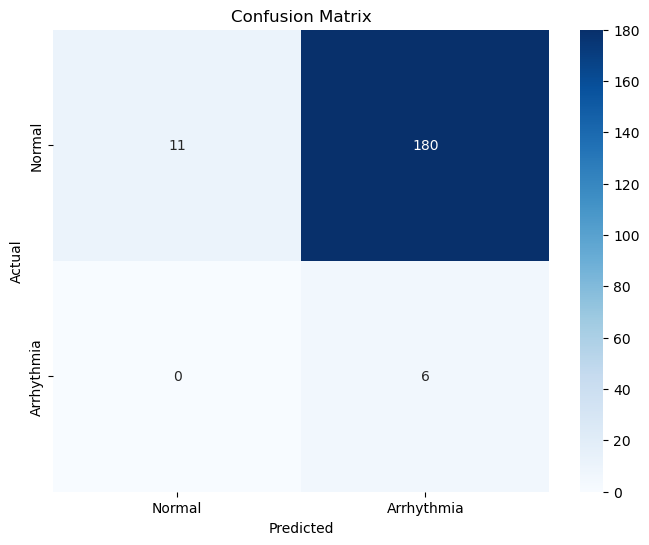

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       191
           1       0.03      1.00      0.06         6

    accuracy                           0.09       197
   macro avg       0.52      0.53      0.09       197
weighted avg       0.97      0.09      0.11       197



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
ppg_data = np.load('downloads/dataset.npy')
case_data = pd.read_csv('downloads/dataset_caseid.csv')

# 2. Extract labels and ensure alignment
labels = case_data['label'].values

# 3. Data scaling
scaler = StandardScaler()
ppg_data_scaled = scaler.fit_transform(ppg_data)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    ppg_data_scaled, labels, test_size=0.2, random_state=42, stratify=labels
)

# 5. Logistic Regression with Ridge Regularization (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 6. Hyperparameter tuning using GridSearch
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Best model
best_model = clf.best_estimator_
print(f"Best Hyperparameters: {clf.best_params_}")

# 7. Evaluate the model
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Arrhythmia'], yticklabels=['Normal', 'Arrhythmia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 9. Function for new data prediction
def predict_new_data(new_data):
    """Predict labels for new PPG data."""
    new_data_scaled = scaler.transform(new_data)
    predictions = best_model.predict(new_data_scaled)
    return predictions


Best Hyperparameters: {'C': 0.01}


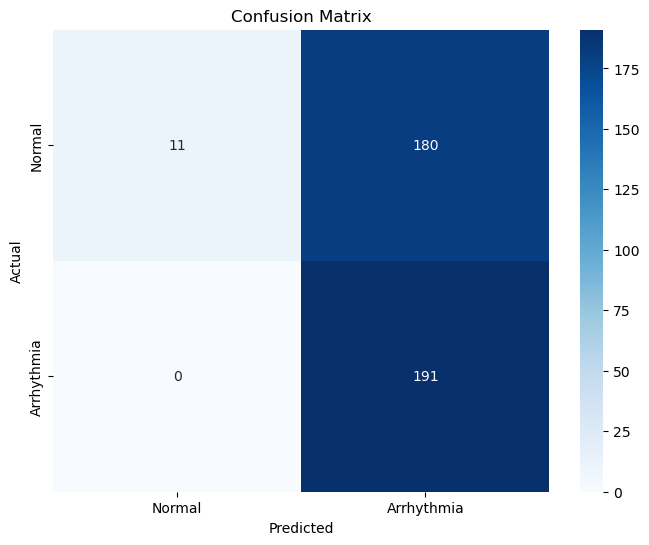

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.11       191
           1       0.51      1.00      0.68       191

    accuracy                           0.53       382
   macro avg       0.76      0.53      0.39       382
weighted avg       0.76      0.53      0.39       382



In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
ppg_data = np.load('downloads/dataset.npy')
case_data = pd.read_csv('downloads/dataset_caseid.csv')

# 2. Extract labels and ensure alignment
labels = case_data['label'].values

# 3. Data scaling
scaler = StandardScaler()
ppg_data_scaled = scaler.fit_transform(ppg_data)

# 4. Address data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(ppg_data_scaled, labels)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 6. Logistic Regression with Ridge Regularization (L2)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# 7. Hyperparameter tuning using GridSearch
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
clf = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Best model
best_model = clf.best_estimator_
print(f"Best Hyperparameters: {clf.best_params_}")

# 8. Evaluate the model
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Arrhythmia'], yticklabels=['Normal', 'Arrhythmia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 9. Save the model for future use
import joblib
joblib.dump(best_model, '/mnt/data/logistic_regression_ppg_model_smote.pkl')

# 10. Function for new data prediction
def predict_new_data(new_data):
    """Predict labels for new PPG data."""
    new_data_scaled = scaler.transform(new_data)
    predictions = best_model.predict(new_data_scaled)
    return predictions
